<a href="https://colab.research.google.com/github/lucyweb/hello-w/blob/master/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification

載入資料集iris（存進變數 `iris`）

In [0]:
from  sklearn.datasets import load_iris

# import dataset（動手做做看）

觀察資料集

In [0]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

觀察資料集筆數及特徵數

In [0]:
print(iris.data)

# 觀察資料集筆數及特徵數(動手做做看)


觀察資料集目標及對應的筆數

In [0]:
print(iris.target)

# 觀察資料集目標及對應的筆數(動手做做看)


In [0]:
import pandas as pd

df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['CLASS'] = iris.target
df.head(10)#列出前10筆
# df.iloc[np.random.randint(150, size = 20),:] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#EDA


Text(0.5, 0, 'sepal length (cm)')

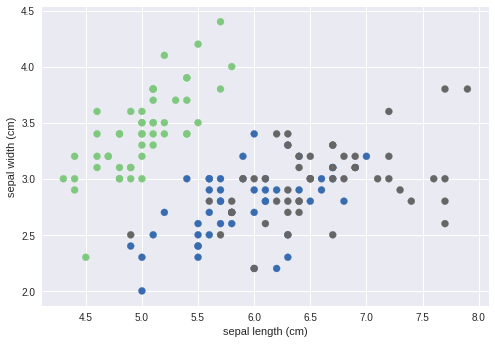

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['Species'] = iris.target

plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['Species'],cmap='Accent')
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')

Text(0.5, 0, 'petal length (cm)')

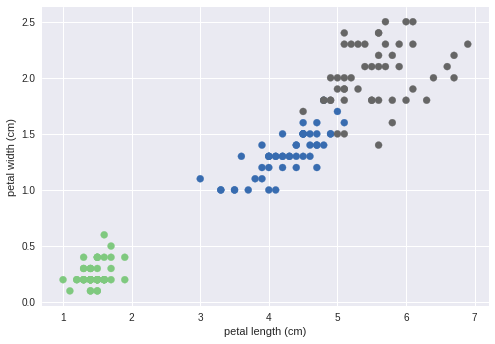

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['Species'] = iris.target

# 畫出x軸為 petal length (cm) , y 軸為 petal width (cm) 的圖 （動手做做看）


#訓練集 / 測試集 

將資料分為訓練及以及測試集（動手做做看）

In [0]:
from sklearn.model_selection import train_test_split

# 將資料分為訓練及以及測試集（動手做做看）

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

# Confusion Matrix

Accuracy:0.96


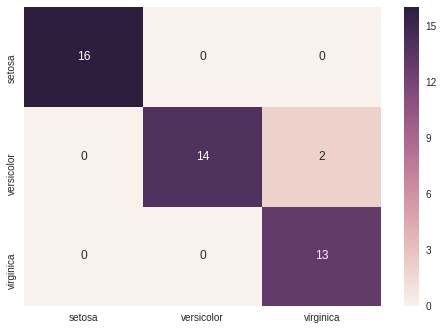

In [0]:
from sklearn import metrics
import seaborn as sns
print('Accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm =pd.DataFrame(confusion_matrix , index = ['setosa', 'versicolor', 'virginica'], columns = ['setosa', 'versicolor', 'virginica'])
sns.heatmap(cm, annot = True)  

In [0]:
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)
print('Classification Output:\n', y_test_pred)
print('Probability Output:\n', y_test_pred_proba)

# Tuning Logistic Regression - C Parameter

train evaluation---------------------------------
accuracy:0.85


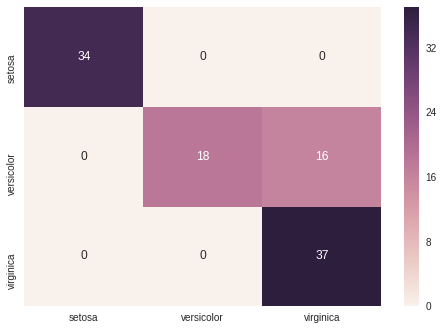

In [0]:
model = LogisticRegression(C=0.2)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('train evaluation---------------------------------')
print('accuracy:%.2f'%metrics.accuracy_score(y_train, y_train_pred))
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm =pd.DataFrame(confusion_matrix , index = ['setosa', 'versicolor', 'virginica'], columns = ['setosa', 'versicolor', 'virginica'])
sns.heatmap(cm, annot = True)  

test evaluation---------------------------------
accuracy:0.89


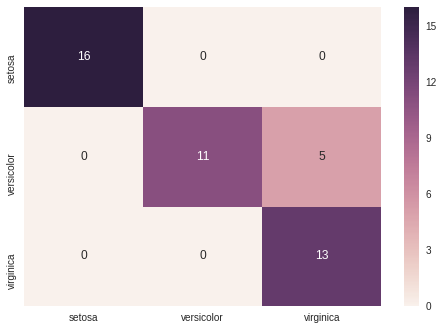

In [0]:
print('test evaluation---------------------------------')
print('accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm =pd.DataFrame(confusion_matrix , index = ['setosa', 'versicolor', 'virginica'], columns = ['setosa', 'versicolor', 'virginica'])
sns.heatmap(cm, annot = True) 


# Tuning Logistic Regression - Multi_Class

In [0]:
### Stochastic Average Gradient, SAG – Mark Schmidt, Nicolas Le Roux, and Francis Bach
### Minimizing Finite Sums with the Stochastic Average Gradient https://hal.inria.fr/hal-00860051/document

train evaluation---------------------------------
accuracy:0.98


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


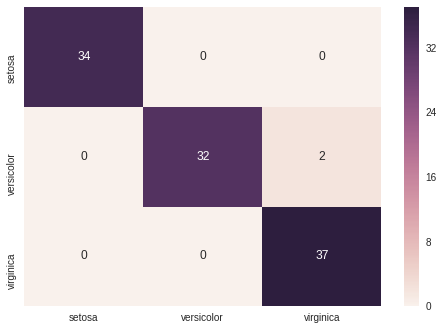

In [0]:
model = LogisticRegression(solver='sag', multi_class='multinomial',max_iter=15)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('train evaluation---------------------------------')
print('accuracy:%.2f'%metrics.accuracy_score(y_train, y_train_pred))
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm =pd.DataFrame(confusion_matrix , index = ['setosa', 'versicolor', 'virginica'], columns = ['setosa', 'versicolor', 'virginica'])
sns.heatmap(cm, annot = True)  

test evaluation---------------------------------
accuracy:0.98


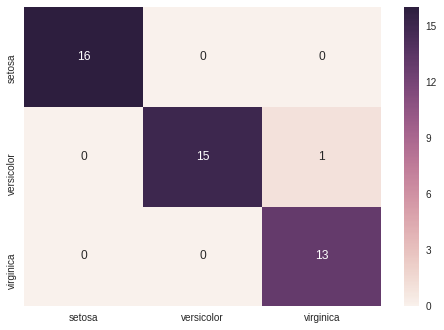

In [0]:
print('test evaluation---------------------------------')
print('accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm =pd.DataFrame(confusion_matrix , index = ['setosa', 'versicolor', 'virginica'], columns = ['setosa', 'versicolor', 'virginica'])
sns.heatmap(cm, annot = True)  